In [105]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
def get_from_logfile(path, tags):
    returns = np.empty((100000,len(tags)))
    returns[:] = np.nan
    it = 0

    for ev, event in enumerate(summary_iterator(path)):
        for value in event.summary.value:
            if value.tag in tags:
                idx = tags.index(value.tag)
                returns[it, idx] = value.simple_value
                if idx == 0 and ev!=0:
                    it += 1

    return pd.DataFrame(returns, columns = tags).dropna()

# Question 1

In [106]:
import os
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if "q1" in path]

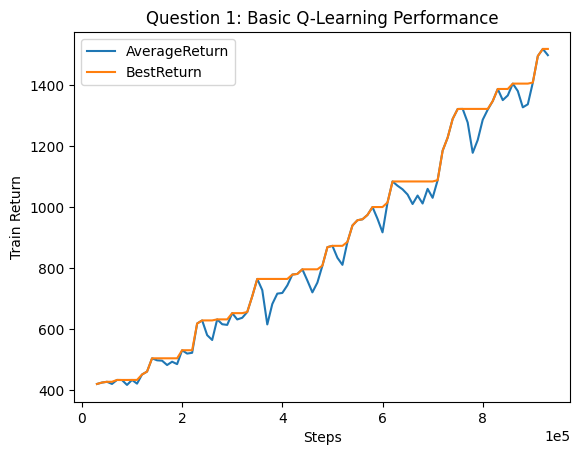

In [107]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
exp1 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Train_AverageReturn", "Train_BestReturn"])
exp1['Train_EnvstepsSoFar'] = exp1['Train_EnvstepsSoFar']-1
exp1.set_index("Train_EnvstepsSoFar", inplace=True)
exp1.columns = ["AverageReturn", "BestReturn"]
for col in exp1.columns:
    plt.plot(exp1[col], label=col)
plt.legend()
plt.ylabel("Train Return")
plt.xlabel("Steps")
plt.title("Question 1: Basic Q-Learning Performance");
plt.savefig("imgs/Q1.png", dpi=600, bbox_inches="tight")

# Question 2

In [108]:
import os
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if "q2" in path]
len(files)

6

In [109]:
ddqn_s1 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Train_AverageReturn"])
ddqn_s2 = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Train_AverageReturn"])
ddqn_s3 = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Train_AverageReturn"])
dqn_s1 = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Train_AverageReturn"])
dqn_s2 = get_from_logfile(files[4], ["Train_EnvstepsSoFar", "Train_AverageReturn"])
dqn_s3 = get_from_logfile(files[5], ["Train_EnvstepsSoFar", "Train_AverageReturn"])
exp2 = pd.DataFrame([(ddqn_s1['Train_AverageReturn']+ddqn_s2['Train_AverageReturn']+ddqn_s3['Train_AverageReturn'])/3,(dqn_s1['Train_AverageReturn']+dqn_s2['Train_AverageReturn']+dqn_s3['Train_AverageReturn'])/3]).T
exp2.columns = ["DDQN", "DQN"]
exp2.index=ddqn_s1['Train_EnvstepsSoFar']-1

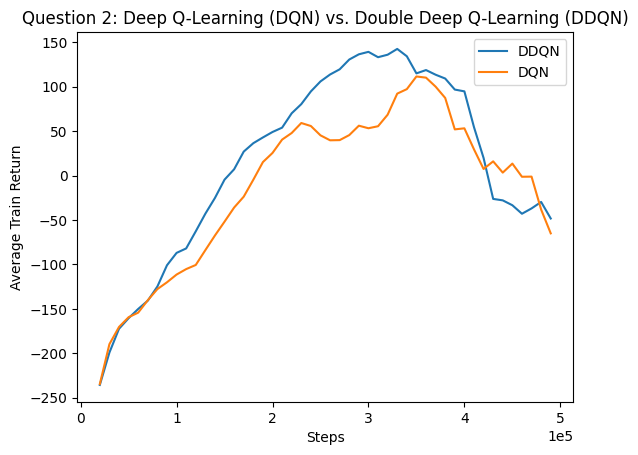

In [110]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
for col in exp2.columns:
    plt.plot(exp2.loc[:, col], label=col)
plt.legend()
plt.ylabel("Average Train Return")
plt.xlabel("Steps")
plt.title("Question 2: Deep Q-Learning (DQN) vs. Double Deep Q-Learning (DDQN)")

plt.savefig("imgs/Q2.png", dpi=600, bbox_inches="tight")

# Question 3

In [111]:
import os
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if "q3" in path]
len(files)

4

In [112]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw3\\data\\q3_lr_0.00001_LunarLander-v3_15-10-2022_16-06-49\\events.out.tfevents.1665875209.JesperPC',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw3\\data\\q3_lr_0.0005_LunarLander-v3_14-10-2022_20-11-27\\events.out.tfevents.1665803487.JesperPC',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw3\\data\\q3_lr_0.005_LunarLander-v3_14-10-2022_23-10-26\\events.out.tfevents.1665814226.JesperPC',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw3\\data\\q3_lr_0.01_LunarLander-v3_15-10-2022_00-14-15\\events.out.tfevents.1665818055.JesperPC']

In [113]:
dqn_lr00001 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Train_AverageReturn"])
dqn_lr0005 = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Train_AverageReturn"])
dqn_lr005 = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Train_AverageReturn"])
dqn_lr01 = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Train_AverageReturn"])
dqn_lr00001.set_index("Train_EnvstepsSoFar", inplace=True)
dqn_lr0005.set_index("Train_EnvstepsSoFar", inplace=True)
dqn_lr005.set_index("Train_EnvstepsSoFar", inplace=True)
dqn_lr01.set_index("Train_EnvstepsSoFar", inplace=True)
dqn_3 = dqn_s1.set_index("Train_EnvstepsSoFar")

In [114]:
exp3 = pd.concat([dqn_lr01, dqn_lr005, dqn_3, dqn_lr00001, dqn_lr0005], axis=1)
exp3.columns = ["1e-2", "5e-3","1e-3*", "1e-5", "5e-4"]
exp3.index = exp3.index - 1

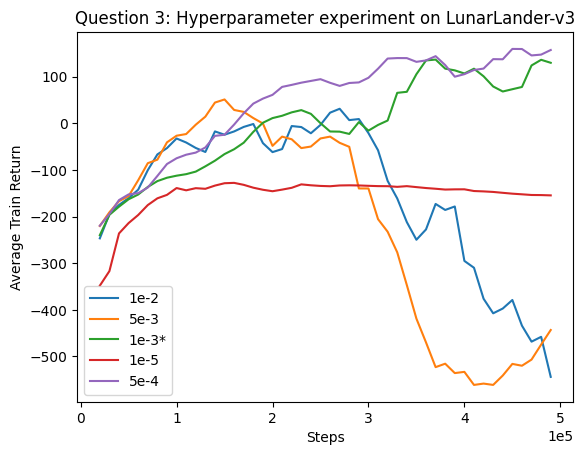

In [115]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
for col in exp3.columns:
    plt.plot(exp3.loc[:, col], label=col)
plt.legend()
plt.ylabel("Average Train Return")
plt.xlabel("Steps")
plt.title("Question 3: Hyperparameter experiment on LunarLander-v3")

plt.savefig("imgs/Q3.png", dpi=600, bbox_inches="tight")

# Question 4

In [116]:
import os
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if "q4" in path]
len(files)

4

In [117]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw3\\data\\q4_100_1_CartPole-v0_08-10-2022_11-13-42\\events.out.tfevents.1665252822.JesperPC',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw3\\data\\q4_10_10_CartPole-v0_08-10-2022_11-13-42\\events.out.tfevents.1665252822.JesperPC',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw3\\data\\q4_1_100_CartPole-v0_08-10-2022_11-13-42\\events.out.tfevents.1665252822.JesperPC',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw3\\data\\q4_ac_1_1_CartPole-v0_08-10-2022_11-13-42\\events.out.tfevents.1665252822.JesperPC']

In [118]:
ntu_100_ngsptu_1 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
ntu_10_ngsptu_10 = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
ntu_1_ngsptu_100 = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
ntu_1_ngsptu_1 = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
ntu_100_ngsptu_1.set_index("Train_EnvstepsSoFar", inplace=True)
ntu_10_ngsptu_10.set_index("Train_EnvstepsSoFar", inplace=True)
ntu_1_ngsptu_100.set_index("Train_EnvstepsSoFar", inplace=True)
ntu_1_ngsptu_1.set_index("Train_EnvstepsSoFar", inplace=True)

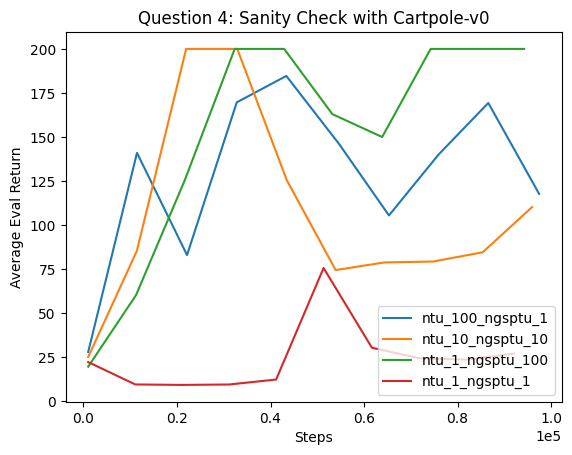

In [119]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(ntu_100_ngsptu_1['Eval_AverageReturn'], label="ntu_100_ngsptu_1")
plt.plot(ntu_10_ngsptu_10['Eval_AverageReturn'], label="ntu_10_ngsptu_10")
plt.plot(ntu_1_ngsptu_100['Eval_AverageReturn'], label="ntu_1_ngsptu_100")
plt.plot(ntu_1_ngsptu_1['Eval_AverageReturn'], label="ntu_1_ngsptu_1")
plt.legend()
plt.ylabel("Average Eval Return")
plt.xlabel("Steps")
plt.title("Question 4: Sanity Check with Cartpole-v0")

plt.savefig("imgs/Q4.png", dpi=600, bbox_inches="tight")

# Question 5

In [120]:
import os
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if "q5" in path]
len(files)

2

In [121]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw3\\data\\q5_HalfCheetah-v4_1_100_14-10-2022_07-04-50\\events.out.tfevents.1665731090.5143dfe5bab7',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw3\\data\\q5_InvertedPendulum-v4_1_100_14-10-2022_06-38-03\\events.out.tfevents.1665729483.5143dfe5bab7']

In [122]:
halfcheetah = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
invertedpen = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
halfcheetah.set_index("Train_EnvstepsSoFar", inplace=True)
invertedpen.set_index("Train_EnvstepsSoFar", inplace=True)

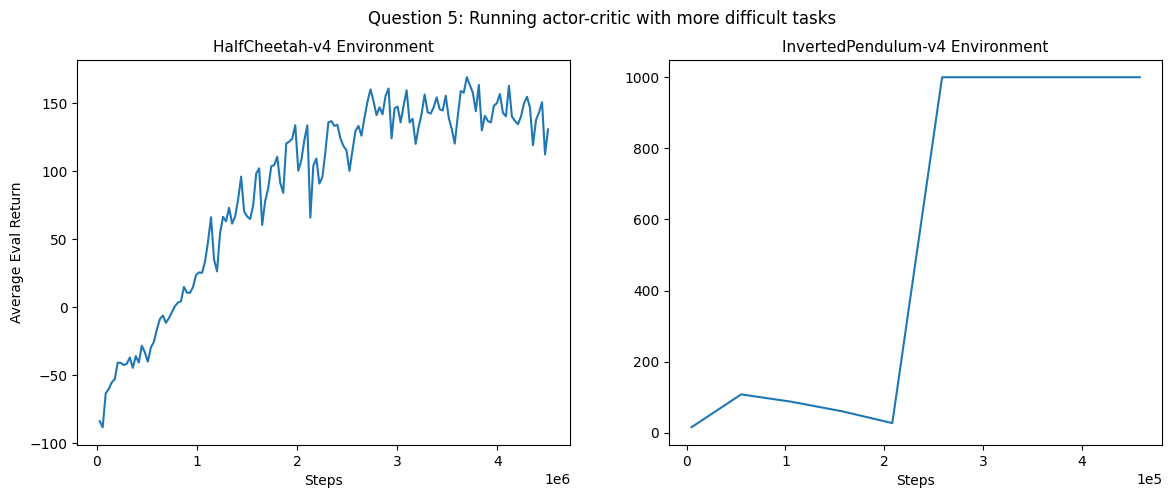

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
axes[0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
axes[1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))

axes[0].plot(halfcheetah['Eval_AverageReturn'])
axes[1].plot(invertedpen['Eval_AverageReturn'])

axes[0].set_ylabel("Average Eval Return")

axes[0].set_xlabel("Steps")
axes[1].set_xlabel("Steps")

axes[0].set_title("HalfCheetah-v4 Environment", fontsize=11)
axes[1].set_title("InvertedPendulum-v4 Environment", fontsize=11)
fig.suptitle("Question 5: Running actor-critic with more difficult tasks")
plt.savefig("imgs/Q5.png", dpi=600, bbox_inches="tight")

# Question 6

In [124]:
import os
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if "q6" in path]

In [125]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw3\\data\\q6a_sac_InvertedPendulum_InvertedPendulum-v4_14-10-2022_05-22-44\\events.out.tfevents.1665724964.5143dfe5bab7',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw3\\data\\q6b_sac_HalfCheetah-v4_13-10-2022_22-40-45\\events.out.tfevents.1665700845.7b846e4cb815']

In [126]:
halfcheetah = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
invertedpen = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
halfcheetah.set_index("Train_EnvstepsSoFar", inplace=True)
invertedpen.set_index("Train_EnvstepsSoFar", inplace=True)

halfcheetah = halfcheetah.loc[:201000,:]

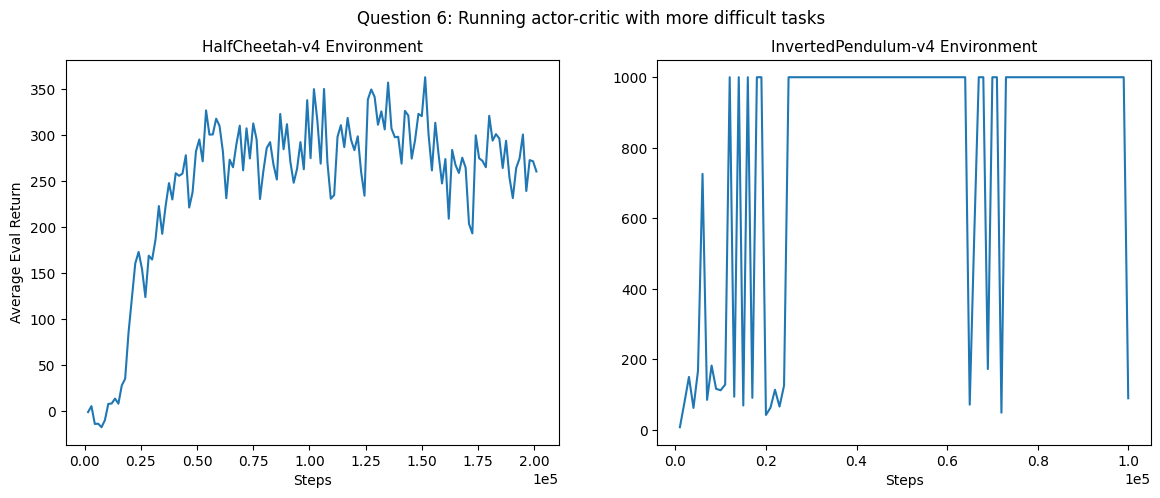

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
axes[0].ticklabel_format(axis="x", style="sci", scilimits=(0,0))
axes[1].ticklabel_format(axis="x", style="sci", scilimits=(0,0))

axes[0].plot(halfcheetah['Eval_AverageReturn'])
axes[1].plot(invertedpen['Eval_AverageReturn'])

axes[0].set_ylabel("Average Eval Return")

axes[0].set_xlabel("Steps")
axes[1].set_xlabel("Steps")

axes[0].set_title("HalfCheetah-v4 Environment", fontsize=11)
axes[1].set_title("InvertedPendulum-v4 Environment", fontsize=11)
fig.suptitle("Question 6: Running actor-critic with more difficult tasks")
plt.savefig("imgs/Q6.png", dpi=600, bbox_inches="tight")